# Linear Regression using Pytorch


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.nn import Linear

torch.__version__

'2.0.0+cu117'

In [2]:
def load_house_data():
    data = torch.from_numpy(np.loadtxt("./data/houses.txt", delimiter=",", skiprows=1))
    X = data[:, :4]
    y = data[:, 4:]
    return X, y


def z_score_normalization(x):
    x_mean = x.mean(dim=0)
    x_std = x.std(dim=0)

    x_norm = (x - x_mean) / x_std

    return x_norm, x_mean, x_std

In [3]:
X_train, y_train = load_house_data()

X_features = ["size(sqft)", "bedrooms", "floors", "age"]

# Normalize data with z-score


In [4]:
X_norm, X_mean, X_std = z_score_normalization(X_train)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:tensor([2.4060e+03, 4.0000e+00, 1.0000e+00, 9.5000e+01], dtype=torch.float64)
Peak to Peak range by column in Normalized X:tensor([5.8157, 6.1042, 2.0459, 3.6667], dtype=torch.float64)


# Create linear node


In [5]:
model = Linear(X_train.shape[1], 1, dtype=X_train.dtype)
model

Linear(in_features=4, out_features=1, bias=True)

# Train the model


In [6]:
learning_rate = 0.001
epochs = 10000

cost = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_norm)
    loss = cost(outputs, y_train)

    loss.backward()

    optimizer.step()

    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 142882.26141489384
epoch 1, loss 142301.13171536734
epoch 2, loss 141722.4942210503
epoch 3, loss 141146.3374605129
epoch 4, loss 140572.6500208899
epoch 5, loss 140001.4205475401
epoch 6, loss 139432.63774370888
epoch 7, loss 138866.29037019238
epoch 8, loss 138302.36724500425
epoch 9, loss 137740.85724304427
epoch 10, loss 137181.74929576946
epoch 11, loss 136625.0323908671
epoch 12, loss 136070.69557193003
epoch 13, loss 135518.7279381342
epoch 14, loss 134969.11864391787
epoch 15, loss 134421.85689866365
epoch 16, loss 133876.93196638176
epoch 17, loss 133334.33316539615
epoch 18, loss 132794.0498680321
epoch 19, loss 132256.0715003062
epoch 20, loss 131720.38754161823
epoch 21, loss 131186.98752444496
epoch 22, loss 130655.8610340362
epoch 23, loss 130126.99770811251
epoch 24, loss 129600.38723656515
epoch 25, loss 129076.0193611578
epoch 26, loss 128553.88387523039
epoch 27, loss 128033.97062340457
epoch 28, loss 127516.26950129155
epoch 29, loss 127000.77045520127


epoch 411, loss 28551.29962276391
epoch 412, loss 28444.038900694668
epoch 413, loss 28337.204814890625
epoch 414, loss 28230.795622243317
epoch 415, loss 28124.809587004653
epoch 416, loss 28019.2449807541
epoch 417, loss 27914.100082366065
epoch 418, loss 27809.373177977355
epoch 419, loss 27705.06256095488
epoch 420, loss 27601.16653186346
epoch 421, loss 27497.68339843379
epoch 422, loss 27394.611475530608
epoch 423, loss 27291.949085120952
epoch 424, loss 27189.694556242608
epoch 425, loss 27087.84622497272
epoch 426, loss 26986.40243439651
epoch 427, loss 26885.361534576215
epoch 428, loss 26784.721882520073
epoch 429, loss 26684.481842151574
epoch 430, loss 26584.6397842788
epoch 431, loss 26485.19408656389
epoch 432, loss 26386.14313349269
epoch 433, loss 26287.48531634456
epoch 434, loss 26189.219033162288
epoch 435, loss 26091.34268872216
epoch 436, loss 25993.8546945042
epoch 437, loss 25896.75346866252
epoch 438, loss 25800.03743599583
epoch 439, loss 25703.705027918073
epo

## View parameters


In [7]:
b_norm = model.bias
w_norm = model.weight
print(f"model parameters:  w: {w_norm.tolist()}, b:{b_norm.tolist()}")

model parameters:  w: [[111.01381201064113, -21.32029765922142, -32.81253702766559, -38.18478337842611]], b:[363.15608007418683]


# Make predictions


In [8]:
y_pred = model(X_norm)

print(f"Prediction on training set:\n{y_pred[:4]}")
print(f"Target values \n{y_train[:4]}")

Prediction on training set:
tensor([[295.1768],
        [485.9568],
        [389.5410],
        [492.1245]], dtype=torch.float64, grad_fn=<SliceBackward0>)
Target values 
tensor([[300.0000],
        [509.8000],
        [394.0000],
        [540.0000]], dtype=torch.float64)


# Plot Results


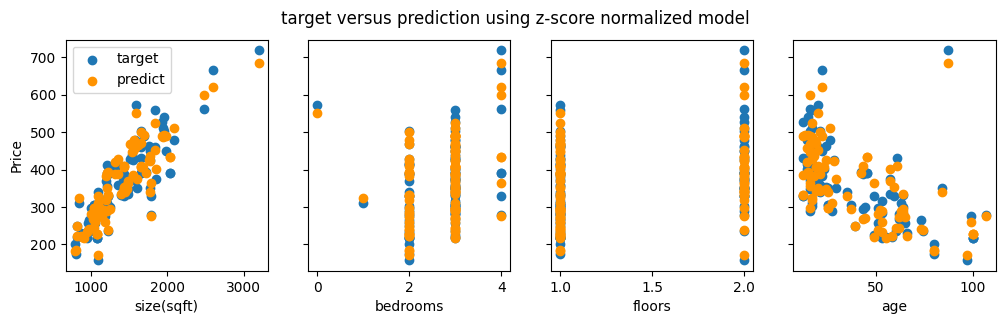

In [9]:
dlc = dict(
    dlblue="#0096ff",
    dlorange="#FF9300",
    dldarkred="#C00000",
    dlmagenta="#FF40FF",
    dlpurple="#7030A0",
)
y_pred = y_pred.detach()

# plot predictions and targets vs original features
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label="target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], y_pred, color=dlc["dlorange"], label="predict")
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()